Two main tasks for this notebook. 
1) Plot brand gender against category usage gender. 
2) 1d jitter plot of brands against heshe axis
3) Get better unstanding of the gender-classifying algorithm.

In [2]:
import gensim.models.keyedvectors as word2vec
import time
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import os
import matplotlib.pyplot as plt
from pylab import *
import scipy
import string

In [12]:
#Plot brand gender against category
# Step 1: Find relative femaleness of each category (what percent is female in each)
# Step 2: Plot what percentage of TOTAL female brands are found in each category
df = pd.read_csv('ftcc_he_she_category_value_counts.csv', header=None)
df_gloss = pd.read_csv('glossary.csv')
df = df[df[0] != 'BASELINE']
df_sums = df.groupby(0).sum()
df_female = df[df[1] == 'F']
missing = set(df_sums.index.tolist()).difference(set(df_female[0].tolist()))
for item in missing:
    df_female = df_female.append({0: item, 1: 'F', 2: 0}, ignore_index=True)
df_joined = pd.merge(df_sums, df_female, on=0)
df_joined['brand_femaleness'] = df_joined['2_y'] / df_joined['2_x']
df_joined = df_joined.sort_values(by='brand_femaleness')
if df_gloss.shape[0] == df_joined.shape[0]:
   df_joined['category_femaleness'] = df_gloss['category_femaleness']
else:
    print("What in heck")
    
df_joined

# total_female = df_female.sum()[2]
# df_joined['brand_femaleness'] = df_joined['2_y'] / total_female
# df_joined


,key_0,2_x,1,2_y,brand_femaleness,category_femaleness
36,F259 Pasta & Pasta Dishes General Promotion,2,F,0,0.000000,0.60
70,V363 Toy Stores,3,F,0,0.000000,0.70
29,D439 Mens Shaving Equipment & Supplies General...,8,F,0,0.000000,0.40
27,D259 Womens Shaving Supplies General Promotion,1,F,0,0.000000,1.00
63,H631 Paint,11,F,1,0.090909,0.30
72,V365 Sporting Goods Stores,6,F,1,0.166667,0.40
58,H310 Household Batteries,9,F,2,0.222222,0.15
48,G411 Fishing Tackle & Equipment,39,F,9,0.230769,0.10
50,G499 Sporting Goods General Promotion,26,F,8,0.307692,0.50
0,A141 Sportswear & Athleticwear,125,F,41,0.328000,0.50


In [14]:
# x = set(df_joined['key_0'].tolist())
# l = []
# for index, row in df_gloss.iterrows():
#     l.append("".join([row['code'],row['category'][1:]]))
# x.difference(l)
df_gloss.shape

(73, 4)

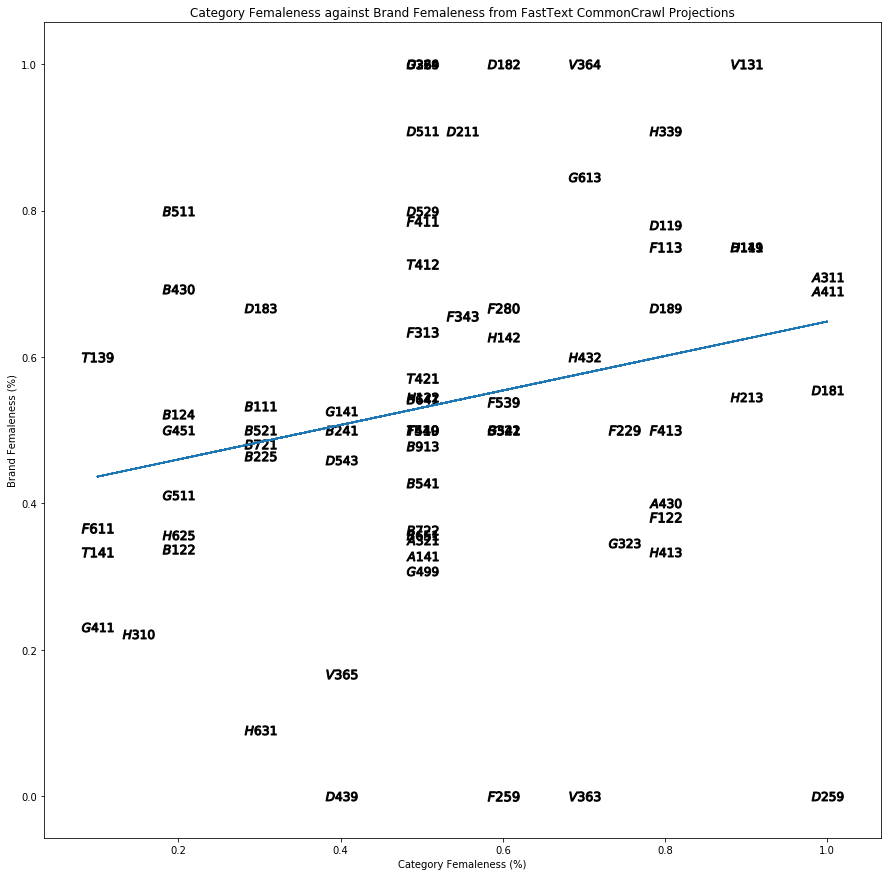

In [15]:
rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
x = []
y = []
for index, row in df_joined.iterrows():
    x.append(row['category_femaleness'])
    y.append(row['brand_femaleness'])
    plt.scatter(row['category_femaleness'], row['brand_femaleness'], c='black', s=1000, marker=r"$ {} $".format(row['key_0'][:5])) 
# plt.ylim(-0.01, 0.08)
plt.xlabel('Category Femaleness (%)')
plt.ylabel('Brand Femaleness (%)')
plt.title('Category Femaleness against Brand Femaleness from FastText CommonCrawl Projections')
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))
plt.savefig('ftcc_category_vs_brand_femaleness.png')
plt.show()

In [ ]:
# df_glossary = pd.DataFrame()
# df_glossary['code'] = df_joined['key_0'].apply(lambda x: x[:5])
# df_glossary['category'] = df_joined['key_0'].apply(lambda x: x[4:])
# df_glossary.sort_values(by='code').to_csv('glossary.csv')
print(x)

In [17]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print("Slope: {}\nIntercept: {}\nR-value: {}\nP-value: {}\nStd-error: {}".format(slope, intercept, r_value, p_value, std_err))

Slope: 0.2355130726868969
Intercept: 0.41306092040102566
R-value: 0.23404815668441542
P-value: 0.04626493161200035
Std-error: 0.11610405978125493


In [18]:
#Plot brand gender against category when brands that are like names are ommitted
# Step 1: Find relative femaleness of each category (what percent is female in each)
# Step 2: Plot what percentage of TOTAL female brands are found in each category
df_nn = pd.read_csv('ftcc_he_she_category_value_counts_no_names.csv', header=None)
df_nn = df_nn[df_nn[0] != 'BASELINE']
df_sums_nn = df_nn.groupby(0).sum()
df_female_nn = df_nn[df_nn[1] == 'F']
missing_nn = set(df_sums_nn.index.tolist()).difference(set(df_female_nn[0].tolist()))
for item in missing_nn:
    df_female_nn = df_female_nn.append({0: item, 1: 'F', 2: 0}, ignore_index=True)
df_joined_nn = pd.merge(df_sums_nn, df_female_nn, on=0)
df_joined_nn['brand_femaleness'] = df_joined_nn['2_y'] / df_joined_nn['2_x']
df_joined_nn = df_joined_nn.sort_values(by='brand_femaleness')
df_joined_nn['key_0'] = df_joined_nn['key_0'].apply(lambda x: x[:5])
df_joined_nn.rename(columns={'key_0': 'code'}, inplace=True)
if df_gloss.shape[0] == df_joined.shape[0]:
   df_joined_nn = pd.merge(df_joined_nn, df_gloss, on='code')
else:
    print("What in heck")
df_joined_nn
# total_female_nn = df_female_nn.sum()[2]
# df_joined_nn['brand_femaleness'] = df_joined_nn['2_y'] / total_female_nn
# df_joined_nn




,code,2_x,1,2_y,brand_femaleness,Unnamed: 0,category,category_femaleness
0,V365,5,F,0,0.000000,72,Sporting Goods Stores,0.40
1,V363,3,F,0,0.000000,70,Toy Stores,0.70
2,T141,2,F,0,0.000000,65,Automotive Batteries,0.10
3,D439,3,F,0,0.000000,29,Mens Shaving Equipment & Supplies General Pro...,0.40
4,H631,6,F,1,0.166667,63,Paint,0.30
5,G411,24,F,4,0.166667,48,Fishing Tackle & Equipment,0.10
6,B722,10,F,2,0.200000,18,"Stationery,Greeting Cards&Misc Paper Gds",0.50
7,H310,9,F,2,0.222222,58,Household Batteries,0.15
8,F611,36,F,9,0.250000,44,Regular Beer & Ale,0.10
9,A430,11,F,3,0.272727,4,Sunglasses,0.80


<Figure size 432x288 with 0 Axes>

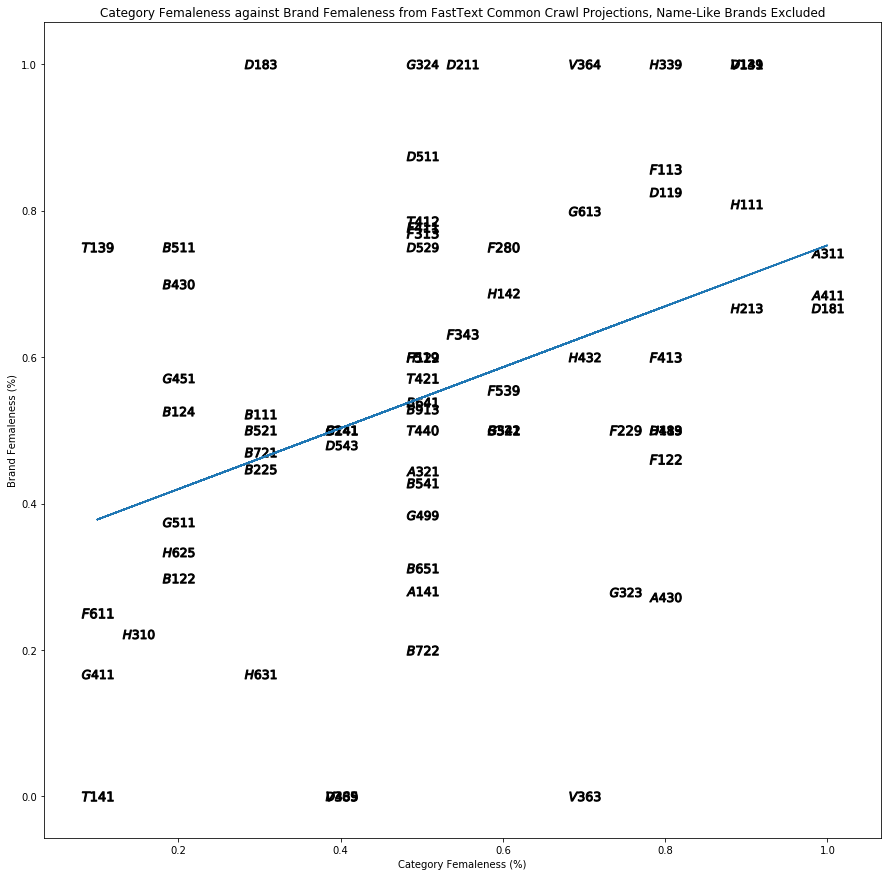

In [21]:
plt.clf()
rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
x_nn = []
y_nn = []
for index, row in df_joined_nn.iterrows():
    x_nn.append(row['category_femaleness'])
    y_nn.append(row['brand_femaleness'])
    plt.scatter(row['category_femaleness'], row['brand_femaleness'], c='black', s=1000, marker=r"$ {} $".format(row['code'][:5])) 
#plt.ylim(-0.01, 0.08)
plt.xlabel('Category Femaleness (%)')
plt.ylabel('Brand Femaleness (%)')
plt.title('Category Femaleness against Brand Femaleness from FastText Common Crawl Projections, Name-Like Brands Excluded')
plt.plot(x_nn, np.poly1d(np.polyfit(x_nn, y_nn, 1))(x_nn))
plt.savefig('ftcc_category_vs_brand_femaleness_no_names.png')
plt.show()

In [22]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_nn, y_nn)
print("Slope: {}\nIntercept: {}\nR-value: {}\nP-value: {}\nStd-error: {}".format(slope, intercept, r_value, p_value, std_err))

Slope: 0.4160557837221912
Intercept: 0.33658991090762785
R-value: 0.39116364926934344
P-value: 0.0008893643368092279
Std-error: 0.11959005644021904
